In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


train = pd.read_csv('new_feauturesExtracted_dataset.csv')
train.head()

train['train'] = np.random.rand(len(train)) < 0.8
df_train = train[train.train == True]
df_test = train[train.train == False]
print(df_train.shape, df_test.shape)

predictors = list(train.columns)
predictors.remove('UserAvgScore')
x1_train = df_train[predictors]
x1_test = df_test[predictors]
y1_train = df_train['Score']
y1_test = df_test['Score']
num_lambdas = 100
lambdas = np.logspace(2, 5, num_lambdas)
y_train_hat = np.zeros((y1_train.shape[0], num_lambdas))
y_test_hat = np.zeros((y1_test.shape[0], num_lambdas))
coefficients = np.zeros((x1_train.shape[1], num_lambdas))

for i, current_lambda in enumerate(lambdas):
  lasso = Lasso(alpha=current_lambda)
  lasso.fit(x1_train, y1_train)

  train_preds = lasso.predict(x1_train)
  test_preds = lasso.predict(x1_test)
  y_train_hat[:,i] = train_preds
  y_test_hat[:,i] = test_preds
  coefficients[:,i] = lasso.coef_
  mse_train = np.zeros(100)
mse_test = np.zeros(100)
for i in range(100):
  mse_train[i] = np.mean( (y1_train - y_train_hat[:,i])**2) 
  mse_test[i] = np.mean( (y1_test - y_test_hat[:,i])**2) 

  

(111618, 21) (28066, 21)


In [ ]:
tuned_mse = np.min(mse_test)
minidx = np.argmin(mse_test)
print("Tuned MSE:", tuned_mse)
print("Index of minimum MSE:", minidx)


Tuned MSE: 1.4343705288053061
Index of minimum MSE: 0


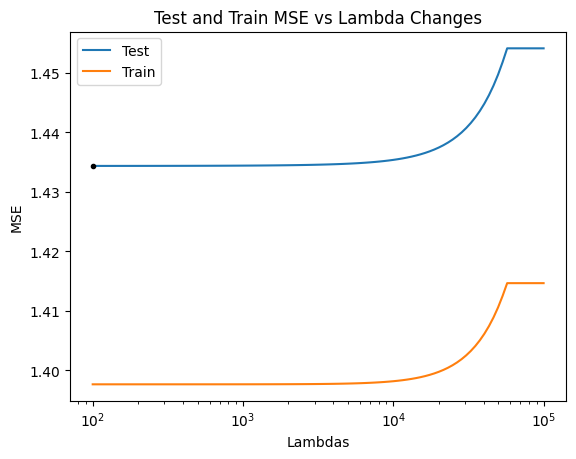

In [ ]:
plt.plot(lambdas, mse_test, label="Test")
plt.plot(lambdas, mse_train, label="Train")
plt.plot(lambdas[minidx], tuned_mse,'.k')
plt.xscale("log")
plt.xlabel("Lambdas") 
plt.ylabel('MSE')
plt.title("Test and Train MSE vs Lambda Changes")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_train = lasso.predict(x1_train)
mse_train = mean_squared_error(y1_train, y_pred_train)

y_pred_test = lasso.predict(x1_test)
mse_test = mean_squared_error(y1_test, y_pred_test)

print("MSE Train: ", mse_train)
print("MSE Test: ", mse_test)

MSE Train:  1.4146528652077934
MSE Test:  1.4541481441511592


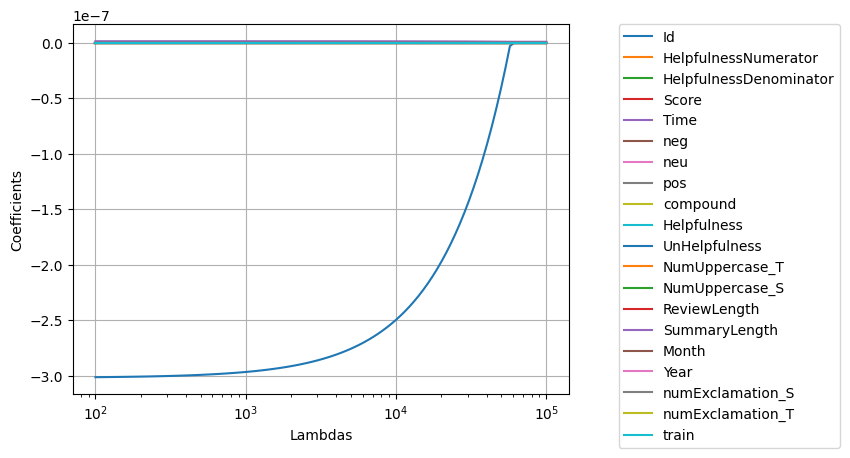

In [ ]:
num_predictors = x1_train.shape[1]

for i in range(num_predictors):
  plt.plot(lambdas,coefficients[i,:], label= x1_train.columns[i])

plt.xscale("log")
plt.xlabel("Lambdas")
plt.ylabel("Coefficients")
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.grid()

plt.show()